<a href="https://colab.research.google.com/github/jacmal/ML-Image-RockPaperScisors-Multilabel-Classyfication/blob/main/RPS_project_orginal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARIES

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random

from keras.preprocessing import image
import tensorflow as tf
import matplotlib.image as mpimg
import pandas as pd

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
#import shutil

In [ ]:
plt.style.use('dark_background')

# Data set analysis and dispaly a sample of images from dataset.

In [ ]:
data_path = '/content/drive/MyDrive/Datasets/RPS_CV_images/orginal_data'
DATA_PATH = '/content/drive/MyDrive/Datasets/RPS_CV_images/orginal_data'

In [ ]:
# check number of photos belong to each class
images = {}
for folder in os.listdir(DATA_PATH):
    images[folder] = len(os.listdir(os.path.join(DATA_PATH, folder)))
print(images)

{'rock': 726, 'paper': 712, 'scissors': 750}


Ilość zdjęć dla poszczególnych klas jest zbliżona, więc nie ma potrzeby zbalansowania ilości zdjęć dla każdej z klas.<br>
<br>
The number of photos for each class is similar, so there is no need to balance them.

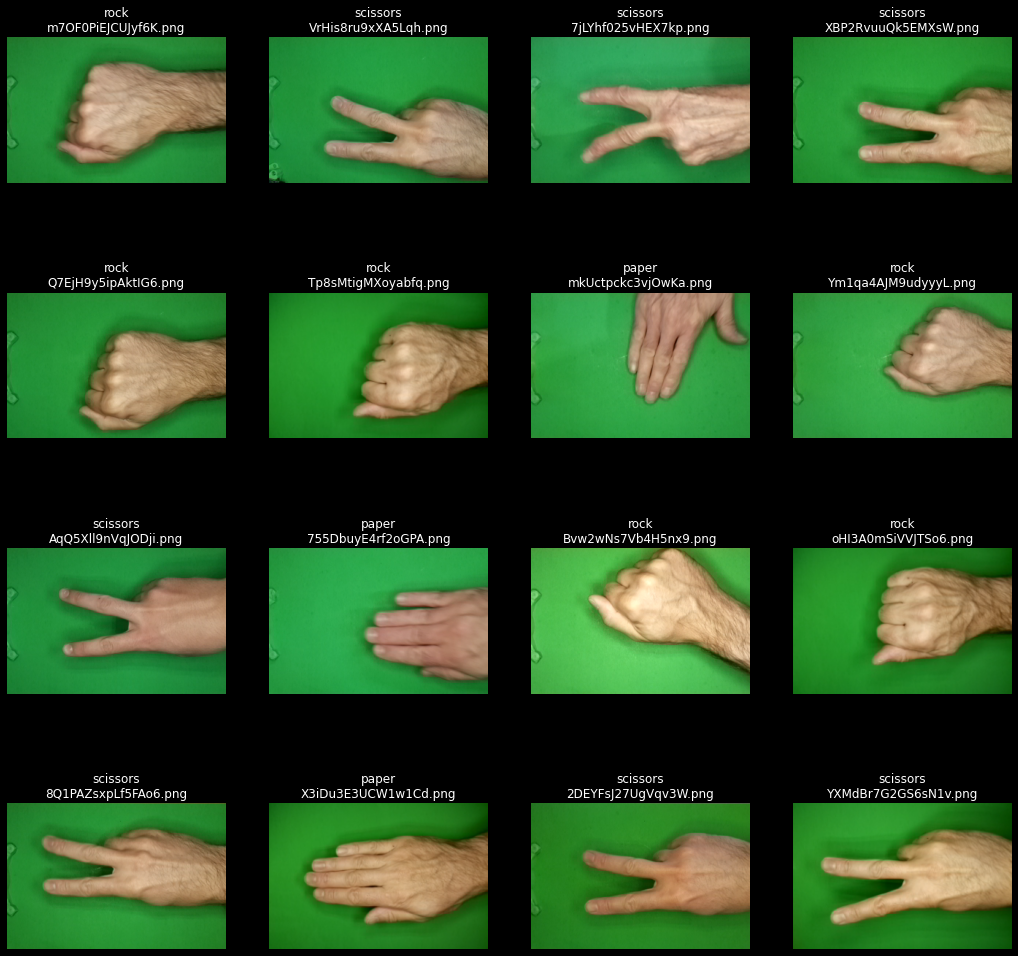

In [ ]:
def image_dataset_preview(data_path=DATA_PATH):
    '''
    Display preview of a data set images.
    '''
    plt.figure(figsize=(18, 18))
    plot_index = 0
    for i in range(16):   
        label = random.choice(os.listdir(data_path))                          # immage text label
        img_name = random.choice(os.listdir(os.path.join(data_path, label)))  # image file name
        img_path = os.path.join(data_path, label, img_name)                   # image file path
        img = mpimg.imread(img_path)                                          # load image file
        
        # image title
        img_tilte = label + "\n" + img_name
        
        # matplotlib plot options
        plot_index += 1
        plt.subplot(4, 4, plot_index)
        plt.title(img_tilte, fontsize=12)
        plt.axis('Off')
        plt.imshow(img)

image_dataset_preview()

# MULTILABEL DATASET CREATION

Z wielo klasowego zbioru danych zawierającego trzy foldery ze zdjęciami z popularnej gry: "papier , nożyce , kamień" wytworzony zostanie nowy  zbiór danych mający symulować grę między dwoma osobami. Nowy wielo etykietowy zbiór  będzie zawierał losowo wybrane, sklejone pary zdjęć oraz ich etykiety.<br>
<br>
- **Wielokalsowy zbiór zdjęć:**<br>
&nbsp;etykieta tekstowa: $["kamień"], ["papier"], ["nożyce"]$<br>
&nbsp;etykieta numeryczna klasy: $[0], [1], [2]$<br>
&nbsp;etykieta "one hot vector": $[1,0,0], [0,1,0], [0,0,1]$<br>
<br><br>
- **Zbiór wielo etykietowy:**<br>
&nbsp;etykieta tekstowa: $["kamień", "kamień"], ["kamień", "papier"], itp.$<br>
&nbsp;etykieta numeryczna: $[0,0], [0,1], itp.$<br>
<br>
część etykiety pierwszego gracza:<br>
&nbsp;np. $["kamień"], [0], [1,0,0,]$<br>
część etykiety drugiego gracza:<br>
&nbsp;np. $["papier"], [1], [0,1,0]$<br>
<br>
etykieta po sklejeniu dwóch wektorów "muliti label vector": $[1,0,0,0,1,0]$ &nbsp;&nbsp; Gracz 1 - "KAMIEŃ", Gracz 2 - "PAPIER"<br>

From a multi-class dataset containing three folders with pictures from the popular game: "paper , scissors , rock" a new dataset will be produced to simulate a game between two people. The new multi-label dataset will contain randomly selected, glued pairs of photos and their labels.<br>
<br>
- **Multi-class image dataset:**<br>
&nbsp;text label: $["rock"], ["paper"], ["scissors"]$<br>
&nbsp;class numeric label: $[0], [1], [2]$<br>
&nbsp;one hot vector label: $[1,0,0], [0,1,0], [0,0,1]$<br>
<br><br>
- **Multi-label image dataset:**<br>
&nbsp;text label: $["rock", "stone"], ["rock", "paper"], etc.$<br>
&nbsp;numeric label: $[0,0], [0,1], etc.$<br>
<br>
part of the first player's label:<br>
&nbsp;$e.g. ["rock"], [0], [1,0,0,]$<br>
part of the second player's label:<br>
&nbsp;$e.g. ["paper"], [1], [0,1,0],$<br>
<br>
muliti label vector:&nbsp;&nbsp; $[1,0,0,0,1,0]$<br>

W celu odróżnienia graczy od siebie, jedno ze zdjęć przed scaleniem zostanie obrócone względem drugiego o 180 stopni.<br>
<br>
In order to distinguish the players from each other, one of the images will be rotated 180 degrees relative to the other before merging.

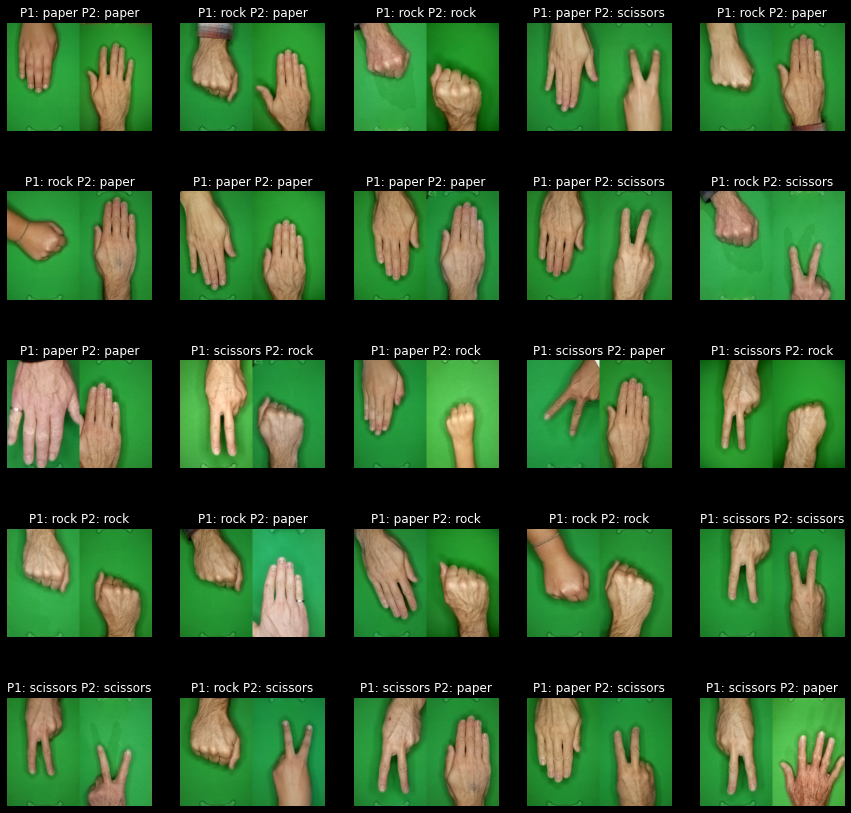

In [ ]:
IMG_SIZE = (100, 150)

def new_dataset_preview(data_path=DATA_PATH):
    '''
    Displays sample images of the new multilabel dataset after transformations.
    '''
    plt.figure(figsize=(15, 15))
    plot_index = 0
    
    for i in range(25):   
        # first random image
        label_1 = random.choice(os.listdir(data_path))                            # image label
        img_name_1 = random.choice(os.listdir(os.path.join(data_path, label_1)))  # image file name
        img_path_1 = os.path.join(data_path, label_1, img_name_1)                 # image file path
        img_1 = image.load_img(img_path_1,  IMG_SIZE)                             # load image
        img_1_arr = tf.keras.preprocessing.image.img_to_array(img_1)              # convert image to numpy array
        img_1_arr = img_1_arr / 255                                               #
        img_1_rot = np.rot90(img_1_arr)                                           # image rotation by 90 deg.

        # second random image
        label_2 = random.choice(os.listdir(data_path))
        img_name_2 = random.choice(os.listdir(os.path.join(data_path, label_2)))
        img_path_2 = os.path.join(data_path, label_2, img_name_2)
        img_2 = image.load_img(img_path_2,  IMG_SIZE)
        img_2_arr = tf.keras.preprocessing.image.img_to_array(img_2)
        img_2_arr = img_2_arr / 255
        img_2_rot = np.rot90(img_2_arr, 3)                                        # image rotation by 270 deg.
        
        # making one image from two images
        new_image = np.concatenate((img_1_rot, img_2_rot), axis=1)

        # matplotlib plot options
        plot_index += 1
        plt.subplot(5, 5, plot_index)
        plt.title('P1: {} P2: {}'.format(label_1, label_2))
        plt.axis('Off')
        plt.imshow(new_image)

new_dataset_preview()

In [ ]:
def rand_file(folder_path):
    '''
    Returns a random file name from path parameter.
    '''
    
    folder_files = os.listdir(folder_path)
    random_file = random.choice(folder_files)
    return random_file

In [ ]:
N_CLASSES = 3

label_1 = 1
label_2 = 2

vec1 = np.zeros(N_CLASSES)
vec1[label_1] = 1
vec2 = np.zeros(N_CLASSES)
vec2[label_2] = 1

concat_vector = np.concatenate((vec1, vec2), axis=None)

array([0., 1., 0., 0., 0., 1.])

In [ ]:
def multi_label_ticket_encoder(label_1, label_2, number_of_class):
    '''
    Takes two numeric labels, creates and returns one two-label vector (numpy.array). e.g. [0,1,0,0,0,1]

        PARAMETERS:
                          labek_1 (int): First numeric class label.
                          label_2 (int): Second numeric class label.
                  number_of_class (int): Number of all classes in dataset.

        RETURNS:
            concat_vector (numpy.array): Multilabel encoded ticket vector.
    '''
    # OLD BAD CODE :)
    #dummy_1 = [] 
    #for i in range(number_of_class):
    #    if i == label_1:
    #        dummy_1.append(1)
    #    else:
    #        dummy_1.append(0)
    #  
    #dummy_2 = [] 
    #for i in range(number_of_class):
    #    if i == label_2:
    #        dummy_2.append(1)
    #    else:
    #        dummy_2.append(0)
    #
    #dummy = np.array(dummy_1 + dummy_2)
    
    vec1, vec2 = np.zeros(number_of_class), np.zeros(number_of_class)
    vec1[label_1], vec2[label_2] = 1, 1

    concat_vector = np.concatenate((vec1, vec2), axis=None)
    
    return concat_vector

In [ ]:
multi_label_ticket_encoder(2, 2, 3)

array([0., 0., 1., 0., 0., 1.])

In [ ]:
def create_multi_label_dataset_2(dataset_path: str, imgs_to_make: int):
    pass

In [ ]:
#IMG_SIZE = (200, 300)
#IMG_SIZE = (100, 100)
IMG_SIZE = (100, 150)

In [ ]:
def create_multi_label_dataset(dataset_path, imgs_to_make, img_size=IMG_SIZE):
    '''
    From the given photo directory, it creates new combined photos (rotates the first photo 90 degrees, the second is rotated 270 degrees) 
    and new "multi-label" type labels for the photos. The created photos and labels will be stored in two separate numpy.arrays that the function returns.

        PARAMETERS:
                          dataset_path (str): Path to the folder with images dataset.
                          imgs_to_make (int): Number of images to create.
                            img_size (tuple): Image shape in tuple (height: int, width: int) 

        RETURNS:
              new_dataset_imgs (numpy.array): Dataset with new images as 4-dimensional numpy array (4D-Tensor).
            new_dataset_labels (numpy.array): Numpy array (matirx) with encoded labels (vectors) of new created images.
    '''
    folder_labels = os.listdir(dataset_path)
    folder_files = []
    dict_labels_to_num = {}
    dict_num_to_label = {}
    new_dataset_imgs = []
    new_dataset_labels = []

    # labels dict
    for i in range(len(folder_labels)):
        dict_labels_to_num[folder_labels[i]] = i
  
    # folder files
    for folder in folder_labels:
        folder_files.append(os.listdir(os.path.join(dataset_path, folder)))
    
    # create new images and labels
    for new_img in range(imgs_to_make):
        rand_folder_1 = random.choice(folder_labels)
        rand_folder_2 = random.choice(folder_labels)
        
        rand_folder_1_path = os.path.join(dataset_path, rand_folder_1)
        rand_folder_2_path = os.path.join(dataset_path, rand_folder_2)
    
        rand_file_1 = random.choice(os.listdir(rand_folder_1_path))
        rand_file_2 = random.choice(os.listdir(rand_folder_2_path))
        
        rand_file_1_path = os.path.join(rand_folder_1_path, rand_file_1)
        rand_file_2_path = os.path.join(rand_folder_2_path, rand_file_2)
    
        rand_num_label_1 = dict_labels_to_num[rand_folder_1]
        rand_num_label_2 = dict_labels_to_num[rand_folder_2]
        #print(rand_num_label_1)
    
        img_1 = image.load_img(rand_file_1_path, target_size=img_size)
        img_2 = image.load_img(rand_file_2_path, target_size=img_size)
        
        img_1_arr = tf.keras.preprocessing.image.img_to_array(img_1)
        img_2_arr = tf.keras.preprocessing.image.img_to_array(img_2)
        
        img_1_arr = img_1_arr / 255
        img_2_arr = img_2_arr / 255
        
        img_1_arr = np.rot90(img_1_arr)
        img_2_arr = np.rot90(img_2_arr, 3)
        
        #
        #img_2_arr = np.flipud(img_2_arr)
        
        img_dummy_label = multi_label_ticket_encoder(rand_num_label_1, rand_num_label_2, 3)
        #print(img_dummy_label)
        img_concat = np.concatenate((img_1_arr, img_2_arr), axis=1)

        # append new image and new vectorized label into separate lists
        new_dataset_imgs.append(img_concat)
        new_dataset_labels.append(img_dummy_label) 

    # conver lists into numpy array
    new_dataset_imgs = np.array(new_dataset_imgs)
    new_dataset_labels = np.array(new_dataset_labels)
    
    return new_dataset_imgs, new_dataset_labels

### testowanie

In [ ]:
X1, Y1 = create_multi_label_dataset(data_path, 1000)

In [ ]:
X2, Y2 = create_multi_label_dataset(data_path, 1000)

In [ ]:
X3, Y3 = create_multi_label_dataset(data_path, 1000)

In [ ]:
# create a new data set in numpy arrays
X_part = np.concatenate((X1, X2))
X = np.concatenate((X_part, X3))

Y_part = np.concatenate((Y1, Y2))
Y = np.concatenate((Y_part, Y3))

In [ ]:
# lets free some RAM
del X1, Y1, X2, Y2, X3, Y3, X_part, Y_part

In [ ]:
Y.shape

(3000, 6)

In [ ]:
a = np.array([[1,2], [3,4]])

In [ ]:
np.flipud(a)

array([[3, 4],
       [1, 2]])

## Create a new multilabel dataset

In [ ]:
# create a new data set as numpy arrays
X, Y = create_multi_label_dataset(data_path, 3000)

In [ ]:
#
X_rest, X_valid, Y_rest, Y_valid = train_test_split(X, Y, test_size=0.15, stratify=Y)
X_train, X_test, Y_train, Y_test = train_test_split(X_rest, Y_rest, test_size=0.15, stratify=Y_rest)

In [ ]:
del X, Y, X_rest, Y_rest

In [ ]:
X_train.shape

(2167, 150, 200, 3)

### do usuniecia

In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2, stratify=Y)
X = np.concatenate((X_train, X_valid))
y = np.concatenate((Y_train, Y_valid))

In [ ]:
def split_data(data, split=0.2):
    split_n = int(len(data) * (1-split))
    all_data = data[:split_n]
    split_data = data[split_n:]
    return all_data, split_data

In [ ]:
def train_valid_test_split(X, Y, valid=0.2, test=0.2):
    X_train, X_valid = split_data(X, split = valid)
    Y_train, Y_valid = split_data(Y, split = valid)

    X_train, X_test = split_data(X_train, split = test)
    Y_train, Y_test = split_data(Y_train, split = test)

    return X_train, Y_train, X_valid, Y_valid, X_test, Y_test

In [ ]:
X_train, Y_train, X_valid, Y_valid, X_test, Y_test = train_valid_test_split(X, Y)

# BUILD CNN MODEL

In [ ]:
## model params

#INPUT_SHAPE = (200, 600, 3)
#INPUT_SHAPE = (100, 200, 3)
INPUT_SHAPE = (150, 200, 3)
N_CLASSES = 3
N_LABELS = 2
output_dim = N_CLASSES * N_LABELS

In [ ]:
def build_simple_model_2(input_shape=INPUT_SHAPE, output_shape=output_dim):
    model = Sequential()
    
    model.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=input_shape))
    #model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.2))

    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(output_shape, activation='sigmoid'))

    return model

In [ ]:
def build_simple_model(input_shape=INPUT_SHAPE, output_shape=output_dim):
    model = None
    model = Sequential()

    model.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.2))

    #model.add(Conv2D(32, 3, padding='same', activation='relu'))
    #model.add(BatchNormalization())
    #model.add(MaxPooling2D(pool_size=(3, 3)))
    #model.add(Dropout(0.2))

    #model.add(Conv2D(64, 3, padding='same', activation='relu'))
    #model.add(BatchNormalization())
    #model.add(MaxPooling2D(pool_size=(3, 3)))
    #model.add(Dropout(0.2))

    #model.add(Conv2D(128, 3, padding='same', activation='relu'))
    #model.add(BatchNormalization())
    #model.add(MaxPooling2D(pool_size=(3, 3)))
    #model.add(Dropout(0.2))

    model.add(Flatten())

    #model.add(Dense(128, activation='relu'))
    #model.add(Dense(256, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    #model.add(Dense(512, activation='relu'))
    
    #model.add(Dense(32, activation='relu'))
    #model.add(Dense(64, activation='relu'))
    #model.add(Dense(128, activation='relu'))
    #model.add(BatchNormalization())
    #model.add(Dropout(0.5))

    #model.add(Dense(128, activation='relu'))
    #model.add(BatchNormalization())
    #model.add(Dropout(0.5))

    # output layer with sigmoid activation function for multilabels classyfication
    model.add(Dense(output_shape, activation='sigmoid'))

    return model

In [ ]:
model = build_simple_model_2()

# MULTIPLE ERROR METRICS FOR MODELS TRAINING, EVALUATION AND TESTING

Dla tego że, nowy wytworzony zbiór zdjęć jest typu "multi-label" metryka treningowa "accuracy" nie jest już odpowiednia. Wynika to z faktu że, teraz pojedynczy wektor etykiety nie jest już wektorem "one-hot" (np. [0,0,0,0,0,1]). Teraz zakodowana w wektor etykieta może wyglądać: np. [0,1,0,0,0,1].
Dlatego potrzeba innych funkcji do liczenie metryki błędu.<br>
<br>
For the fact that, the new image set produced is of type "multi-label" the training metric "accuracy" is no longer appropriate. This is because, now a single label vector is no longer a "one-hot" vector (e.g., [0,0,0,0,0,0,1]). Now a label encoded into a vector can look like: e.g. [0,1,0,0,0,0,1].
So I need other functions to count the error metric.

In [ ]:
# IMPORT FOR TRAINING METRICS #
################################################################################

import numpy as np
import pickle as pk
import apk
import tensorflow as tf

from sklearn.metrics import f1_score
from sklearn.preprocessing import MultiLabelBinarizer
from keras import backend as K

################################################################################
# patk #
########

def patk(actual, pred, k=6):
		# we return 0 if k is 0 because 
		# we can't divide the no of common values by 0 
		if k == 0:
				return 0

		# taking only the top k predictions in a class 
		k_pred = pred[:k]

		# taking the set of the actual values 
		actual_set = set(actual)

		# taking the set of the predicted values 
		pred_set = set(k_pred)

		# taking the intersection of the actual set and the pred set
		# to find the common values
		common_values = actual_set.intersection(pred_set)

		return len(common_values)/len(pred[:k])

################################################################################
# apatk #
#########

def apatk(acutal, pred, k=6):
		# creating a list for storing the values of precision for each k 
		precision_ = []
		for i in range(1, k+1):
				
				# calculating the precision at different values of k 
				# and appending them to the list 
				precision_.append(pk.patk(acutal, pred, i))

		#return 0 if there are no values in the list
		if len(precision_) == 0:
				return 0 

		#returning the average of all the precision values
		return np.mean(precision_)

################################################################################
# mapk #
########

def mapk(acutal, pred, k=6):

		#creating a list for storing the Average Precision Values
		average_precision = []
		
		#interating through the whole data and calculating the apk for each 
		for i in range(len(acutal)):
				average_precision.append(apk.apatk(acutal[i], pred[i], k))

		#returning the mean of all the data
		return np.mean(average_precision)

################################################################################
# f1_sampled #
##############

def f1_sampled(actual, pred):
    #converting the multi-label classification to a binary output
    mlb = MultiLabelBinarizer()
    actual = mlb.fit_transform(actual)
    pred = mlb.fit_transform(pred)

    #fitting the data for calculating the f1 score 
    f1 = f1_score(actual, pred, average = "samples")
    return f1

################################################################################
# recall #
##########

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall_keras = true_positives / (possible_positives + K.epsilon())
    return recall_keras

################################################################################
# precision #
#############

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision_keras = true_positives / (predicted_positives + K.epsilon())
    return precision_keras

################################################################################
# specificity #
###############

def specificity(y_true, y_pred):
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1 - y_true) * y_pred, 0, 1)))
    return tn / (tn + fp + K.epsilon())

################################################################################
# negative predictive value #
#############################

def negative_predictive_value(y_true, y_pred):
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip(y_true * (1 - y_pred), 0, 1)))
    return tn / (tn + fn + K.epsilon())

################################################################################
# f1 score #
############

def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r + K.epsilon()))

################################################################################
# fbeta score #
###############

def fbeta(y_true, y_pred, beta=2):
    y_pred = K.clip(y_pred, 0, 1)

    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=1)
    fp = K.sum(K.round(K.clip(y_pred - y_true, 0, 1)), axis=1)
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)), axis=1)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    num = (1 + beta ** 2) * (p * r)
    den = (beta ** 2 * p + r + K.epsilon())
    return K.mean(num / den)

################################################################################
# matthews correlation coefficient #
####################################

def matthews_correlation_coefficient(y_true, y_pred):
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1 - y_true) * y_pred, 0, 1)))
    fn = K.sum(K.round(K.clip(y_true * (1 - y_pred), 0, 1)))

    num = tp * tn - fp * fn
    den = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
    return num / K.sqrt(den + K.epsilon())

################################################################################
# equal error rate #
####################

def equal_error_rate(y_true, y_pred):
    n_imp = tf.count_nonzero(tf.equal(y_true, 0), dtype=tf.float32) + tf.constant(K.epsilon())
    n_gen = tf.count_nonzero(tf.equal(y_true, 1), dtype=tf.float32) + tf.constant(K.epsilon())

    scores_imp = tf.boolean_mask(y_pred, tf.equal(y_true, 0))
    scores_gen = tf.boolean_mask(y_pred, tf.equal(y_true, 1))

    loop_vars = (tf.constant(0.0), tf.constant(1.0), tf.constant(0.0))
    cond = lambda t, fpr, fnr: tf.greater_equal(fpr, fnr)
    body = lambda t, fpr, fnr: (
        t + 0.001,
        tf.divide(tf.count_nonzero(tf.greater_equal(scores_imp, t), dtype=tf.float32), n_imp),
        tf.divide(tf.count_nonzero(tf.less(scores_gen, t), dtype=tf.float32), n_gen)
    )
    t, fpr, fnr = tf.while_loop(cond, body, loop_vars, back_prop=False)
    eer = (fpr + fnr) / 2
    return eer

## do usunięcia (różne metryki treningowe)

In [ ]:
import numpy as np
#import pk
import pickle as pk

def apatk(acutal, pred, k=6):
	#creating a list for storing the values of precision for each k 
	precision_ = []
	for i in range(1, k+1):
		#calculating the precision at different values of k 
		#      and appending them to the list 
		precision_.append(pk.patk(acutal, pred, i))

	#return 0 if there are no values in the list
	if len(precision_) == 0:
		return 0 

	#returning the average of all the precision values
	return np.mean(precision_)

In [ ]:
import numpy as np
import apk

def mapk(acutal, pred, k=6):

	#creating a list for storing the Average Precision Values
	average_precision = []
	#interating through the whole data and calculating the apk for each 
	for i in range(len(acutal)):
		average_precision.append(apk.apatk(acutal[i], pred[i], k))

	#returning the mean of all the data
	return np.mean(average_precision)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.preprocessing import MultiLabelBinarizer

def f1_sampled(actual, pred):
    #converting the multi-label classification to a binary output
    mlb = MultiLabelBinarizer()
    actual = mlb.fit_transform(actual)
    pred = mlb.fit_transform(pred)

    #fitting the data for calculating the f1 score 
    f1 = f1_score(actual, pred, average = "samples")
    return f1

In [ ]:
import numpy as np
import tensorflow as tf
from keras import backend as K


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall_keras = true_positives / (possible_positives + K.epsilon())
    return recall_keras


def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision_keras = true_positives / (predicted_positives + K.epsilon())
    return precision_keras


def specificity(y_true, y_pred):
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1 - y_true) * y_pred, 0, 1)))
    return tn / (tn + fp + K.epsilon())


def negative_predictive_value(y_true, y_pred):
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip(y_true * (1 - y_pred), 0, 1)))
    return tn / (tn + fn + K.epsilon())


def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r + K.epsilon()))


def fbeta(y_true, y_pred, beta=2):
    y_pred = K.clip(y_pred, 0, 1)

    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=1)
    fp = K.sum(K.round(K.clip(y_pred - y_true, 0, 1)), axis=1)
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)), axis=1)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    num = (1 + beta ** 2) * (p * r)
    den = (beta ** 2 * p + r + K.epsilon())
    return K.mean(num / den)


def matthews_correlation_coefficient(y_true, y_pred):
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1 - y_true) * y_pred, 0, 1)))
    fn = K.sum(K.round(K.clip(y_true * (1 - y_pred), 0, 1)))

    num = tp * tn - fp * fn
    den = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
    return num / K.sqrt(den + K.epsilon())


def equal_error_rate(y_true, y_pred):
    n_imp = tf.count_nonzero(tf.equal(y_true, 0), dtype=tf.float32) + tf.constant(K.epsilon())
    n_gen = tf.count_nonzero(tf.equal(y_true, 1), dtype=tf.float32) + tf.constant(K.epsilon())

    scores_imp = tf.boolean_mask(y_pred, tf.equal(y_true, 0))
    scores_gen = tf.boolean_mask(y_pred, tf.equal(y_true, 1))

    loop_vars = (tf.constant(0.0), tf.constant(1.0), tf.constant(0.0))
    cond = lambda t, fpr, fnr: tf.greater_equal(fpr, fnr)
    body = lambda t, fpr, fnr: (
        t + 0.001,
        tf.divide(tf.count_nonzero(tf.greater_equal(scores_imp, t), dtype=tf.float32), n_imp),
        tf.divide(tf.count_nonzero(tf.less(scores_gen, t), dtype=tf.float32), n_gen)
    )
    t, fpr, fnr = tf.while_loop(cond, body, loop_vars, back_prop=False)
    eer = (fpr + fnr) / 2

    return eer

# CNN MODEL TRAINING

In [ ]:
model.compile(#optimizer='adam',
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              loss = 'binary_crossentropy',
              #metrics=['accuracy'])
              metrics=[f1, fbeta])

In [ ]:
EPOCHS = 20
BATCH_SIZE = 64

In [ ]:
# add training function
# add plots and training metrics
# add training checkpoints, save and load

In [ ]:
# ???
history = model.fit(X_train, Y_train, epochs=EPOCHS, validation_data=(X_valid, Y_valid), batch_size=BATCH_SIZE)

Epoch 1/20
34/34 [==============================] - 71s 2s/step - loss: 0.4782 - f1: 0.7275 - fbeta: 0.7834 - val_loss: 0.6899 - val_f1: 0.6823 - val_fbeta: 0.7822
Epoch 2/20
34/34 [==============================] - 65s 2s/step - loss: 0.2100 - f1: 0.8941 - fbeta: 0.9172 - val_loss: 0.4495 - val_f1: 0.6921 - val_fbeta: 0.7189
Epoch 3/20
34/34 [==============================] - 66s 2s/step - loss: 0.0976 - f1: 0.9573 - fbeta: 0.9649 - val_loss: 0.2332 - val_f1: 0.9015 - val_fbeta: 0.8850
Epoch 4/20
34/34 [==============================] - 64s 2s/step - loss: 0.0557 - f1: 0.9793 - fbeta: 0.9815 - val_loss: 0.1568 - val_f1: 0.9480 - val_fbeta: 0.9377
Epoch 5/20
34/34 [==============================] - 65s 2s/step - loss: 0.0287 - f1: 0.9930 - fbeta: 0.9931 - val_loss: 0.1235 - val_f1: 0.9520 - val_fbeta: 0.9436
Epoch 6/20
34/34 [==============================] - 64s 2s/step - loss: 0.0222 - f1: 0.9952 - fbeta: 0.9945 - val_loss: 0.0907 - val_f1: 0.9651 - val_fbeta: 0.9525
Epoch 7/20
34/34

In [ ]:
# unchanged from your code
tr_datagen = ImageDataGenerator()
    #featurewise_center=True,
    #featurewise_std_normalization=True,
    #rotation_range=20,
    #width_shift_range=0.1,
    #height_shift_range=0.1)
    #horizontal_flip=True)

# create new generator for validation
val_datagen = ImageDataGenerator()    # don't perform augmentation on validation data


# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)

#tr_datagen.fit(X_train)    # can leave this out if not standardising or whitening 
#val_datagen.fit(X_valid)     # can leave this out if not standardising or whitening


# alternative to model.fit_generator
for epoch in range(EPOCHS):
    print('Epoch', epoch)
    batches = 0

    # combine both generators, in python 3 using zip()
    for (x_batch, y_batch), (val_x, val_y) in zip(tr_datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
                                                  val_datagen.flow(X_valid, Y_valid, batch_size=BATCH_SIZE)):
        
        model.fit(x_batch, y_batch, validation_data=(val_x, val_y))
        batches += 1
        if batches >= len(X_train) / BATCH_SIZE:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break

### do usunięcia

In [ ]:
history = None
for epoch in range(EPOCHS):
    print('Epoch', epoch)
    batches = 0
    for x_batch, y_batch in datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE):
        #model.fit(x_batch, y_batch)
        history = model.fit(x_batch, y_batch)
        batches += 1
        if batches >= len(X_train) / BATCH_SIZE:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break

In [ ]:
### ???
history = None
for epoch in range(EPOCHS):
    print('Epoch', epoch)
    batches = 0
    for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=BATCH_SIZE, subset='training'), steps_per_epoch=steps_per_epoch, epochs=epochs, validation_data=datagen.flow(x_train, y_train, batch_size=BATCH_SIZE, subset='validation'), validation_steps=validation_steps):
        #model.fit(x_batch, y_batch)
        history = model.fit(x_batch, y_batch)
        batches += 1
        if batches >= len(X_train) / BATCH_SIZE:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break

# MODEL SCORES AND TRAINING METRICS

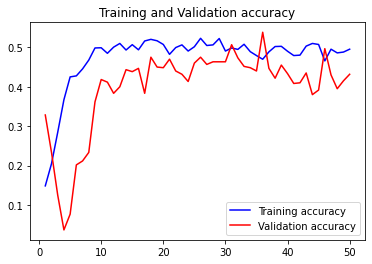

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

#Train and validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend();

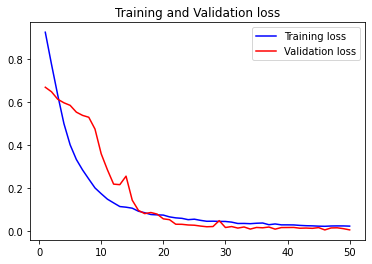

In [ ]:
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend();

In [ ]:
print('[INFO] Calculating model accuracy...')

scores = model.evaluate(X_test, Y_test)
#scores = model.evaluate(test_data_gen)
model_score = round(scores[1]*100, 2)
model_score_int = int(scores[1]*100)

print('\n###########################')
print('## Test Accuracy: {:.4}% ##'.format(scores[1]*100))
print('###########################')

[INFO] Calculating model accuracy...
12/12 [==============================] - 3s 257ms/step - loss: 0.0578 - accuracy: 0.5065

###########################
## Test Accuracy: 50.65% ##
###########################


In [ ]:
history

In [ ]:
Y_raw = model.predict(X_test)
Y_pred = np.where(Y_raw > 0.5, 1, 0)

In [ ]:
Y_pred

array([[1, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 1, 0, 1, 0, 0],
       ...,
       [0, 1, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0]])

In [ ]:
Y_test

array([[1, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 1, 0, 1, 0, 0],
       ...,
       [0, 1, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0]])

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(Y_test, Y_pred, average='micro')

0.973359324236517

In [ ]:
model_score_int = 97

# SAVE THE MODEL

In [ ]:
# model file name
MODEL_NAME = 'RPS_simple_model'
model_name = MODEL_NAME + '_accuracy_' + str(model_score_int) + '_.h5'

# save the model to disk
print("[INFO] Saving model...")

path_to_save_model = os.path.join(data_path, model_name)
model.save(path_to_save_model)

print("\nModel name: ", model_name)
print("Model path: ", path_to_save_model)
print("\nModel Saved !!!")

[INFO] Saving model...

Model name:  RPS_simple_model_accuracy_97_.h5
Model path:  /content/drive/MyDrive/Datasets/RPS_CV_images/orginal_data/RPS_simple_model_accuracy_97_.h5

Model Saved !!!


### do usuniecia

In [ ]:
model.fit(datagen.flow(X, Y, batch_size=128,
         subset='training'),
         validation_data=datagen.flow(X, Y,
         batch_size=128, subset='validation'),
         steps_per_epoch=len(X_train) / 32, epochs=10)

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)
# fits the model on batches with real-time data augmentation:
model.fit(datagen.flow(x_train, y_train, batch_size=32,
         subset='training'),
         validation_data=datagen.flow(x_train, y_train,
         batch_size=8, subset='validation'),
         steps_per_epoch=len(x_train) / 32, epochs=10)
# here's a more "manual" example
for e in range(epochs):
    print('Epoch', e)
    batches = 0
    for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=32):
        model.fit(x_batch, y_batch)
        batches += 1
        if batches >= len(x_train) / 32:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break
